# Objective
The Healthy Eating Dataset contains various features that determine whether a meal is healthy, such as calories amount and cooking method. This dataset falls under the health and wellness domain, but it also has strong applications in marketing, particularly for brands and organizations involved in nutrition, fitness, or health products. By combining behavioral and demographic data, the dataset provides a holistic view of what influences food health.

Analyzing this dataset can generate valuable insights for both health researchers and marketers. For example, it can help identify which factors most strongly predict healthy versus unhealthy food type, and reveal trends that can guide targeted marketing strategies. This dataset can help to build the model that supports classification tasks (e.g., predicting if a new meal is healthy based on its content), clustering, and consumer profiling. These insights can be used to design more personalized campaigns, develop healthier product offerings for targeted groups, and support public health initiatives that promote better lifestyle choices.

In [1]:
import pandas as pd

file_path = "healthy_eating_dataset.csv"
df = pd.read_csv(file_path)

df.head(5)

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg


# Data Preprocessing and Cleaning 

In [2]:
# set index and drop unnecessary variables
df.set_index('meal_id', inplace = True)
df.drop(["meal_name","image_url"], axis=1, inplace=True)

# check missing value
missing_data=df.isnull().sum()
missing_data

cuisine           0
meal_type         0
diet_type         0
calories          0
protein_g         0
carbs_g           0
fat_g             0
fiber_g           0
sugar_g           0
sodium_mg         0
cholesterol_mg    0
serving_size_g    0
cooking_method    0
prep_time_min     0
cook_time_min     0
rating            0
is_healthy        0
dtype: int64

In [3]:
# define y and X
y = df['is_healthy']
X = df.drop(columns=['is_healthy', 'rating'], errors='ignore')

# split data into numeric and categorical
df_numeric = df.select_dtypes(include=["int64", "float64"]).drop(columns=["is_healthy", "rating"])
df_categorical=df.select_dtypes(include=["object"])

In [4]:
df_numeric

,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min
meal_id,,,,,,,,,,,
1,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,47,56
2,182,74.7,144.4,0.1,22.3,38.6,423,7,317,51,34
3,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,58,29
4,427,17.5,73.1,7.6,9.8,41.7,846,107,499,14,81
5,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,47,105
...,...,...,...,...,...,...,...,...,...,...,...
1996,163,16.0,48.1,3.6,26.6,40.9,984,155,447,37,71
1997,177,79.5,24.4,12.9,27.1,13.6,1612,271,211,60,9
1998,419,31.8,42.9,42.7,9.4,29.1,1192,201,248,50,95


In [5]:
df_categorical

,cuisine,meal_type,diet_type,cooking_method
meal_id,,,,
1,Indian,Lunch,Keto,Grilled
2,Mexican,Lunch,Paleo,Roasted
3,Indian,Snack,Paleo,Boiled
4,Mexican,Snack,Keto,Grilled
5,Thai,Lunch,Vegan,Raw
...,...,...,...,...
1996,Mediterranean,Lunch,Keto,Grilled
1997,Mediterranean,Snack,Balanced,Roasted
1998,Indian,Lunch,Balanced,Roasted


## Visualization

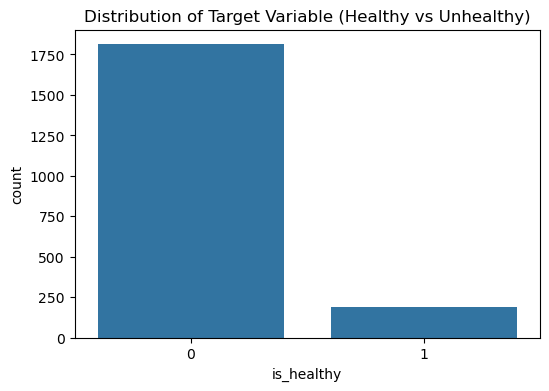

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# target balance
plt.figure(figsize=(6, 4))
sns.countplot(x='is_healthy', data=df)
plt.title('Distribution of Target Variable (Healthy vs Unhealthy)')
plt.show()

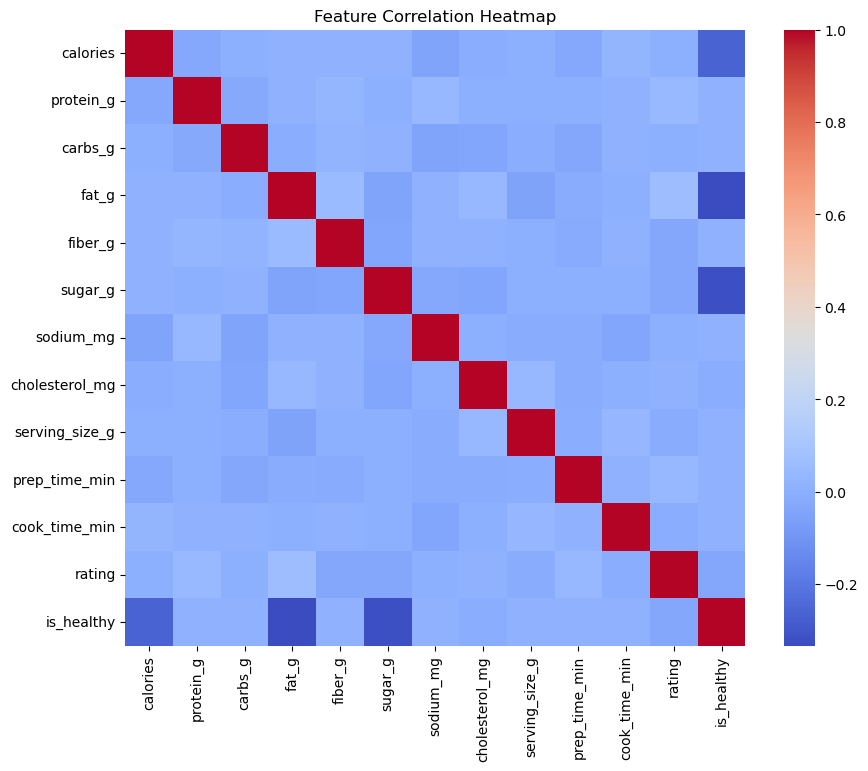

In [7]:
# heat map
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## EDA for Numeric DF

In [8]:
base = df_numeric.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]).round(1)

cv = ((df_numeric.std() / df_numeric.mean()).round(2))* 100
skew = df_numeric.skew()
kurt = df_numeric.kurt()
missing = df_numeric.isnull().sum()

extra_stats = pd.DataFrame({
    "cv" : cv,
    "skew" : skew,
    "kurtosis" : kurt, 
    "missing" : missing
}).round(1).T

descriptives = pd.concat([base, extra_stats])

descriptives

,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,650.1,42.9,75.9,30.1,15.2,24.6,1257.3,150.5,302.6,33.4,61.5
std,315.4,22.0,42.7,17.6,8.8,14.5,709.6,87.9,115.5,16.5,33.6
min,100.0,5.0,0.0,0.0,0.0,0.0,50.0,0.0,100.0,5.0,5.0
10%,216.0,12.1,16.8,4.9,3.0,4.7,273.9,28.0,142.0,10.0,15.0
25%,372.0,23.6,39.2,14.8,7.6,12.0,647.5,72.0,207.0,19.0,33.0
50%,648.0,43.6,76.0,30.3,15.2,24.8,1273.0,150.0,302.0,34.0,61.0
75%,914.5,61.9,113.0,45.2,23.2,37.2,1854.5,228.0,402.0,48.0,90.0
90%,1092.1,73.3,135.5,54.3,27.0,44.5,2247.2,272.0,463.0,56.0,109.0
max,1200.0,79.9,150.0,60.0,30.0,50.0,2499.0,300.0,500.0,60.0,120.0


## Dummy Variables and New Features for Categorical DF

In [9]:
# set dummy variables
columns_to_encode = ['cuisine', 'meal_type', 'diet_type', 'cooking_method']
df_categorical=pd.get_dummies(df, columns=columns_to_encode, drop_first=True).fillna(0).astype(int)

nominal_cols = ['cuisine', 'meal_type', 'cooking_method', 'diet_type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# add new features
df['protein_ratio'] = df['protein_g'] / df['calories']
df['high_protein_ratio'] = (df['protein_ratio'] > df['protein_ratio'].median()).astype(int)
df['meal_size_score'] = df['calories'] + df['protein_g'] + df['carbs_g'] + df['fat_g']
df['large_meal'] = (df['meal_size_score'] > df['meal_size_score'].median()).astype(int)

# drop unnecessary variables
df = df.drop(['rating', 'protein_ratio', 'meal_size_score'], axis=1)

df

,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,...,cooking_method_Raw,cooking_method_Roasted,cooking_method_Steamed,diet_type_Keto,diet_type_Low-Carb,diet_type_Paleo,diet_type_Vegan,diet_type_Vegetarian,high_protein_ratio,large_meal
meal_id,,,,,,,,,,,,,,,,,,,,,
1,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,47,...,0,0,0,1,0,0,0,0,1,1
2,182,74.7,144.4,0.1,22.3,38.6,423,7,317,51,...,0,1,0,0,0,1,0,0,1,0
3,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,58,...,0,0,0,0,0,1,0,0,0,1
4,427,17.5,73.1,7.6,9.8,41.7,846,107,499,14,...,0,0,0,1,0,0,0,0,0,0
5,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,47,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,163,16.0,48.1,3.6,26.6,40.9,984,155,447,37,...,0,0,0,1,0,0,0,0,1,0
1997,177,79.5,24.4,12.9,27.1,13.6,1612,271,211,60,...,0,1,0,0,0,0,0,0,1,0
1998,419,31.8,42.9,42.7,9.4,29.1,1192,201,248,50,...,0,1,0,0,0,0,0,0,1,0


## Multicollinearity Check

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# remove problematic features
cols_to_drop = [
    'cuisine_Chinese',          
    'meal_type_Dinner',        
    'cooking_method_Boiled',   
    'diet_type_Keto'
]
df = df.drop(columns=cols_to_drop)

vif_data = pd.DataFrame()
vif_data["variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data.sort_values("VIF", ascending=False, inplace=True)

vif_data

,variable,VIF
0,calories,20.758095
1,protein_g,10.501164
30,large_meal,7.524533
8,serving_size_g,7.143576
29,high_protein_ratio,5.937221
9,prep_time_min,4.716805
10,cook_time_min,4.197475
3,fat_g,4.161075
5,sugar_g,4.073679
2,carbs_g,3.980136


## Outlier Check

In [11]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = {}

binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
numeric_cols = [col for col in numeric_cols if col not in binary_cols]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    lower_outliers = df[df[col] < lower_bound][col].count()
    upper_outliers = df[df[col] > upper_bound][col].count()
    total_outliers = lower_outliers + upper_outliers
    
    outlier_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
        "Total Outliers": total_outliers
    }
    
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df

,Q1,Q3,IQR,Lower Bound,Upper Bound,Lower Outliers,Upper Outliers,Total Outliers
calories,372.0,914.500,542.500,-441.7500,1728.2500,0.0,0.0,0.0
protein_g,23.6,61.900,38.300,-33.8500,119.3500,0.0,0.0,0.0
carbs_g,39.2,113.025,73.825,-71.5375,223.7625,0.0,0.0,0.0
fat_g,14.8,45.200,30.400,-30.8000,90.8000,0.0,0.0,0.0
fiber_g,7.6,23.200,15.600,-15.8000,46.6000,0.0,0.0,0.0
sugar_g,12.0,37.200,25.200,-25.8000,75.0000,0.0,0.0,0.0
sodium_mg,647.5,1854.500,1207.000,-1163.0000,3665.0000,0.0,0.0,0.0
cholesterol_mg,72.0,228.000,156.000,-162.0000,462.0000,0.0,0.0,0.0
serving_size_g,207.0,402.000,195.000,-85.5000,694.5000,0.0,0.0,0.0
prep_time_min,19.0,48.000,29.000,-24.5000,91.5000,0.0,0.0,0.0


## Boxplot for Outliers

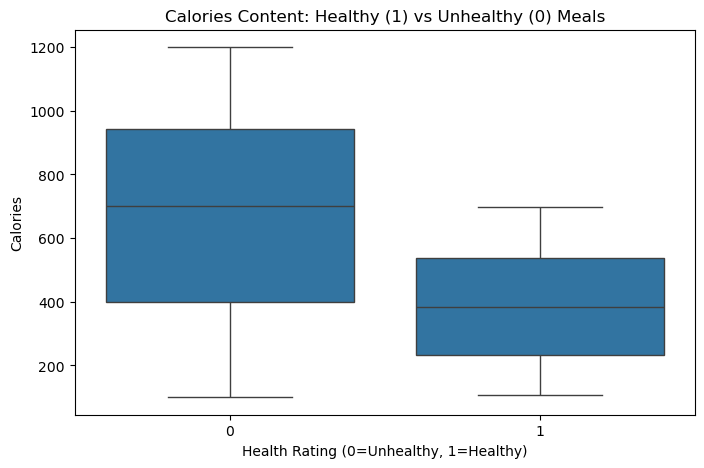

In [12]:
# calories

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_healthy', y='calories', data=df)
plt.title('Calories Content: Healthy (1) vs Unhealthy (0) Meals')
plt.xlabel('Health Rating (0=Unhealthy, 1=Healthy)')
plt.ylabel('Calories')
plt.show()

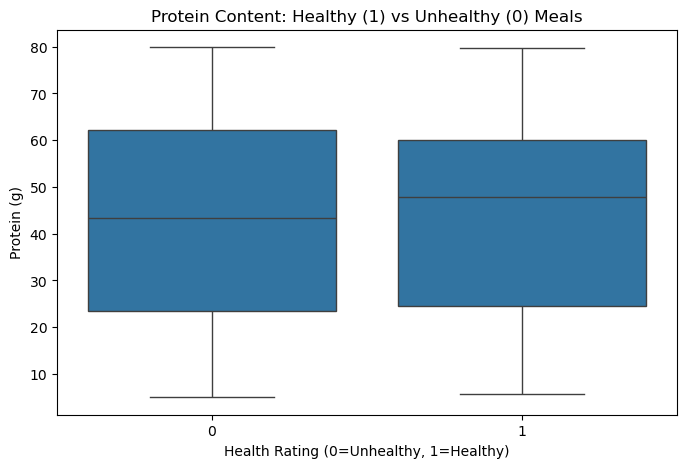

In [13]:
# protein

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_healthy', y='protein_g', data=df)
plt.title('Protein Content: Healthy (1) vs Unhealthy (0) Meals')
plt.xlabel('Health Rating (0=Unhealthy, 1=Healthy)')
plt.ylabel('Protein (g)')
plt.show()

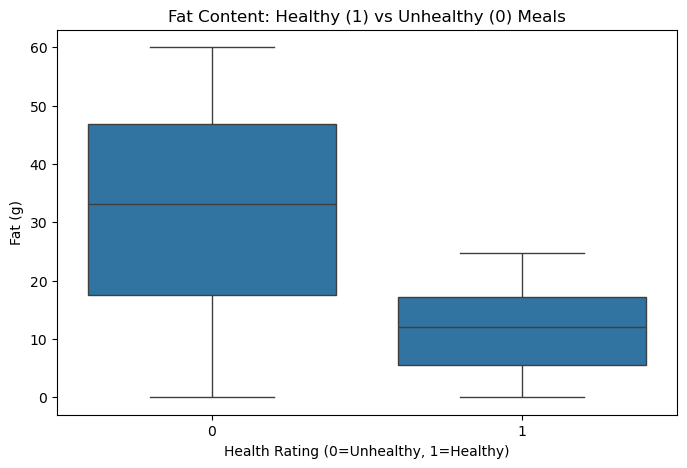

In [14]:
# fat

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_healthy', y='fat_g', data=df)
plt.title('Fat Content: Healthy (1) vs Unhealthy (0) Meals')
plt.xlabel('Health Rating (0=Unhealthy, 1=Healthy)')
plt.ylabel('Fat (g)')
plt.show()

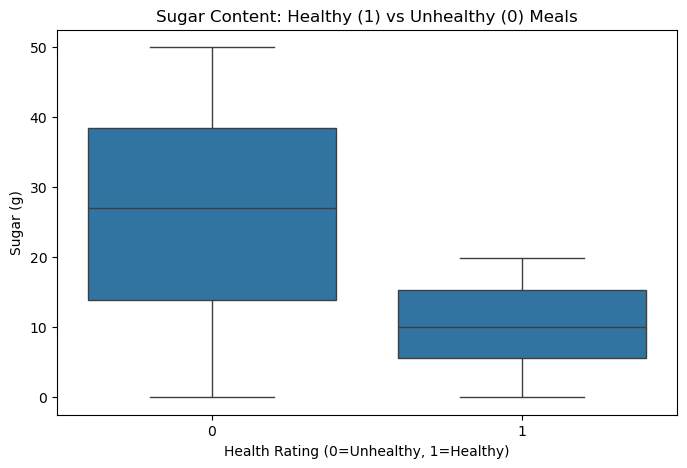

In [15]:
# sugar

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_healthy', y='sugar_g', data=df)
plt.title('Sugar Content: Healthy (1) vs Unhealthy (0) Meals')
plt.xlabel('Health Rating (0=Unhealthy, 1=Healthy)')
plt.ylabel('Sugar (g)')
plt.show()

## Features Scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['is_healthy'])
y = df['is_healthy']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=123
)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
features_to_scale = [col for col in numeric_features if X[col].nunique() > 2]

scaler = StandardScaler()

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

## Model A

In [17]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Interpret Logistic Regression Coefficients

/var/folders/hp/3cplv6191rgf96fnjy14gmpr0000gn/T/ipykernel_24048/1136725400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)


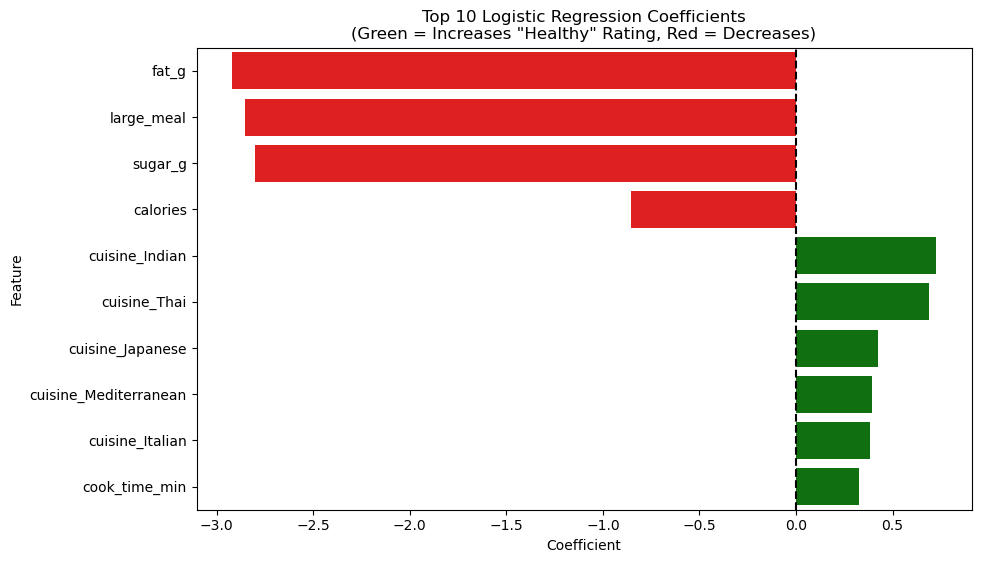

Top 10 Influential Features (Logistic Regression):


,Feature,Coefficient
3,fat_g,-2.921929
29,large_meal,-2.853566
5,sugar_g,-2.799298
0,calories,-0.853118
11,cuisine_Indian,0.726436
16,cuisine_Thai,0.688549
13,cuisine_Japanese,0.425518
14,cuisine_Mediterranean,0.391896
12,cuisine_Italian,0.381793
10,cook_time_min,0.324118


In [18]:
coefs = logreg.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})

coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False).head(10) # Top 10

plt.figure(figsize=(10, 6))
# color bar: green for positive, red for negative
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)
plt.title('Top 10 Logistic Regression Coefficients\n(Green = Increases "Healthy" Rating, Red = Decreases)')
plt.axvline(x=0, color='black', linestyle='--') # Add a zero line
plt.show()

print("Top 10 Influential Features (Logistic Regression):")
display(coef_df[['Feature', 'Coefficient']])

# Model B

In [19]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

dt = DecisionTreeClassifier(random_state=123)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2%}")
y_pred_dt = best_dt.predict(X_test)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 99.64%


## Identify Important Features

/var/folders/hp/3cplv6191rgf96fnjy14gmpr0000gn/T/ipykernel_24048/3166864822.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


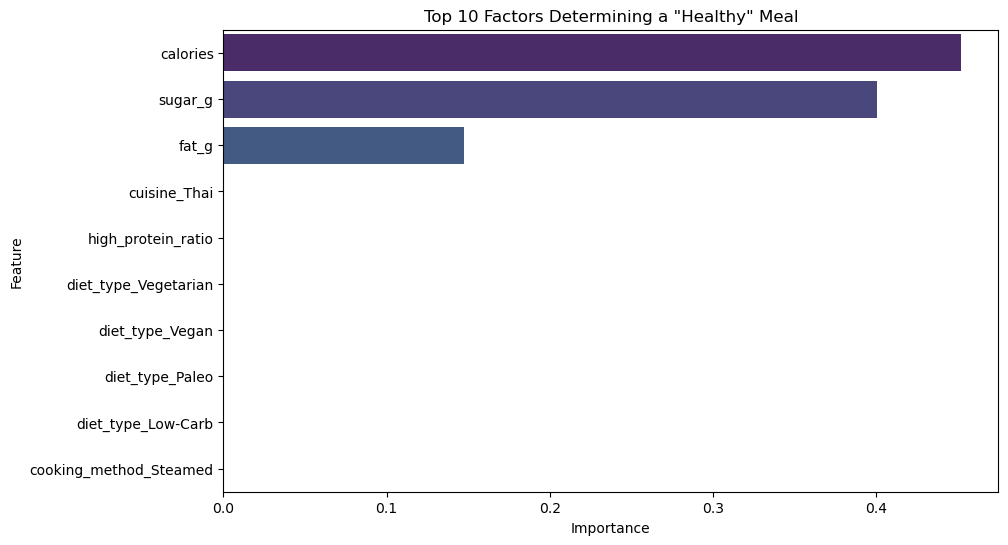

In [20]:
importances = best_dt.feature_importances_
feature_names = X_train.columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Factors Determining a "Healthy" Meal')
plt.show()

## Confision Matrix

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 531                   9
Actual Positive                  20                  40


## ROC Curve

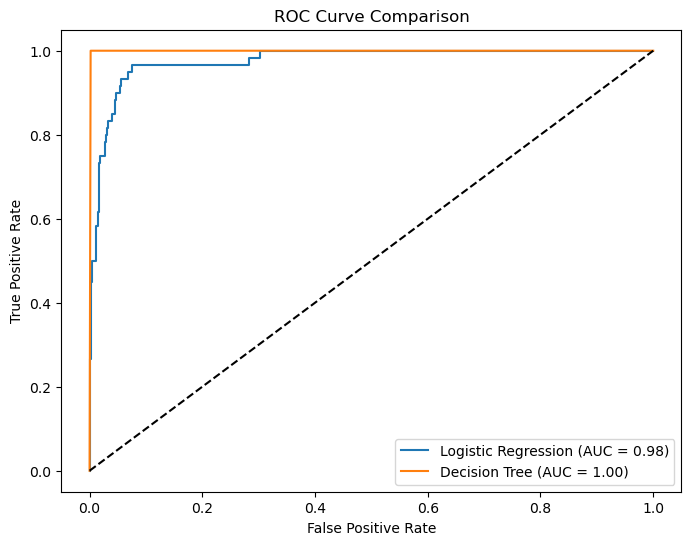

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Model Metric

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# model 1
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]
tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test, y_pred_log).ravel()
spec_log = tn_log / (tn_log + fp_log)

# model 2 
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()
spec_dt = tn_dt / (tn_dt + fp_dt)

# metric
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall (Sensitivity)': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt)
    ],
    'Specificity': [
        spec_log, spec_dt
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt)
    ],
    'AUC': [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_dt)
    ]
}

# display dataframe
comparison_df = pd.DataFrame(metrics_data).set_index('Model')


print("Final Model Comparison:")
display(comparison_df.round(4))

Final Model Comparison:


,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,AUC
Model,,,,,,
Logistic Regression,0.9517,0.8163,0.6667,0.9833,0.7339,0.9764
Decision Tree,0.9983,0.9836,1.0000,0.9981,0.9917,0.9991
